In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movie=pd.read_csv("C:/Users/Yogendra/Downloads/my_movies.csv")
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
movie = movie.iloc[:,5:]
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
movie.duplicated().sum()

3

In [ ]:
#Though we have duplicate entries, we do not remove them because this is transaction data. 

In [5]:
# sorting movies popularity wise
list = movie.sum()
list= list.sort_values(ascending=False)
list

Gladiator        7
Sixth Sense      6
Patriot          6
LOTR1            2
Harry Potter1    2
LOTR2            2
Green Mile       2
Harry Potter2    1
LOTR             1
Braveheart       1
dtype: int64

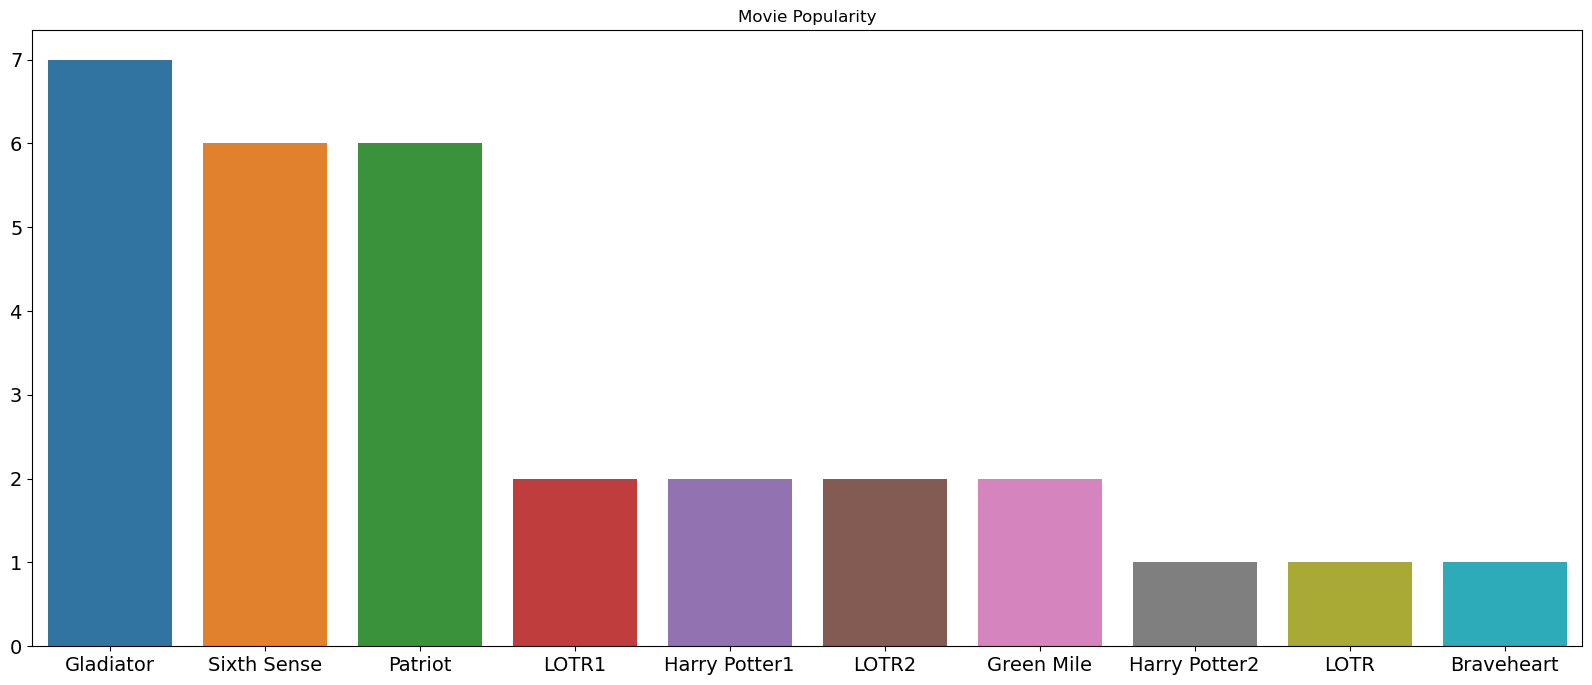

In [6]:
plt.figure(figsize=(20,8))
sns.barplot(x= list.index, y=list.values, order=list.index )
plt.title('Movie Popularity')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [7]:
#Getting Association rules with 10% Support and 30% confidence
frequent_items = apriori(movie, min_support=0.1, use_colnames=True)
frequent_items

C:\Users\Yogendra\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [8]:
rules = association_rules(frequent_items, metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
212,"(LOTR2, LOTR1)","(Sixth Sense, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
213,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(LOTR2),"(Sixth Sense, Harry Potter1, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [ ]:
#Antecedent support variable tells us probability of antecedent products alone
#Consequents support variable tells us probability of consequents products alone
#The support value is the value of the two products (Antecedents and Consequents)
#Confidence is an indication of how often the rule has been found to be true.
#The ratio of the observed support to that expected if X and Y were independent.
#A leverage value of 0 indicates independence. Range will be [-1 1]
#A high conviction value means that the consequent is highly depending on the antecedent and range will be [0 inf]

In [9]:
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
165,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
86,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
117,"(Gladiator, Green Mile)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
157,"(Green Mile, LOTR1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
143,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
6,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
14,(Green Mile),(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6,-0.333333


In [10]:
rules[(rules.lift>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
212,"(LOTR2, LOTR1)","(Sixth Sense, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
213,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(LOTR2),"(Sixth Sense, Harry Potter1, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


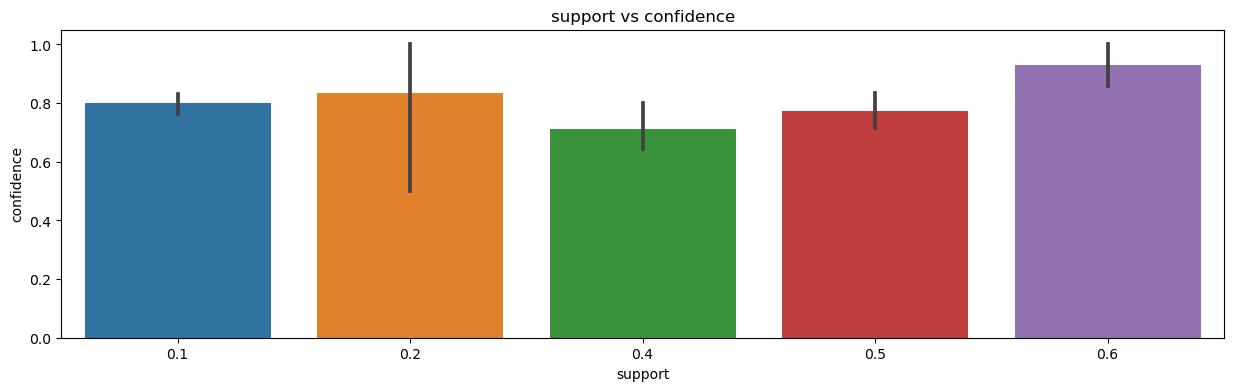

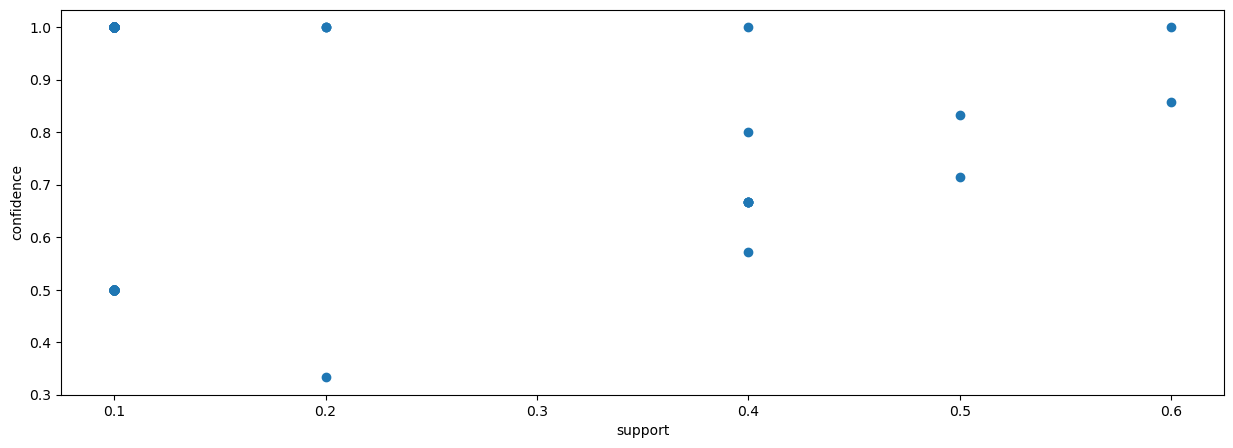

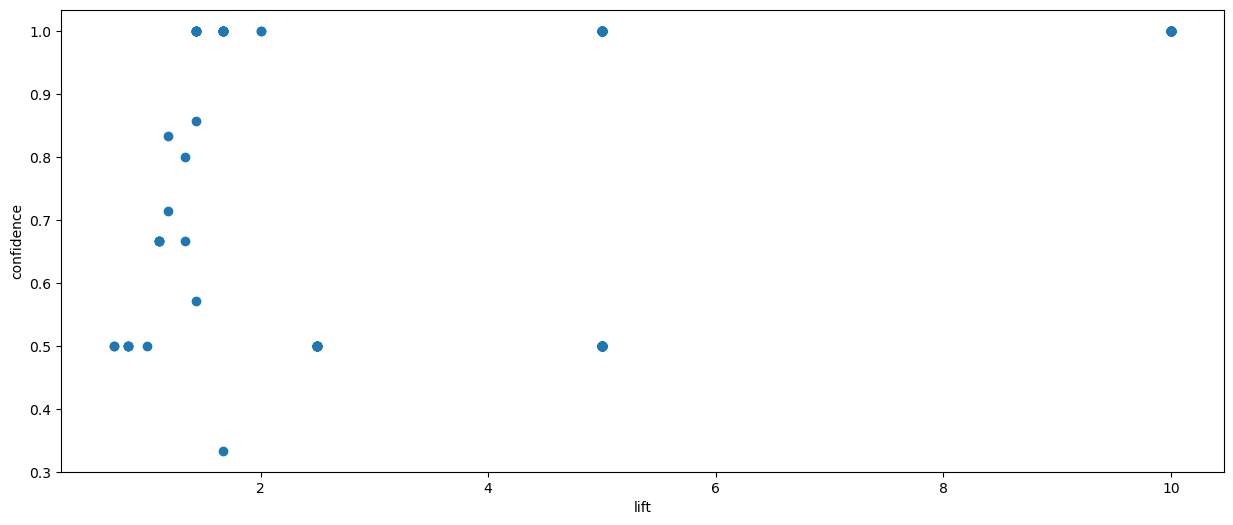

In [18]:
plt.figure(figsize=(15,4))
sns.barplot(rules,x="support",y="confidence")
plt.title("support vs confidence")
plt.show()

plt.figure(figsize=(15,5))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

plt.figure(figsize=(15,6))
plt.scatter(rules['lift'],rules['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

In [19]:
piv = rules.pivot('antecedents','consequents','lift')

<Axes: xlabel='consequents', ylabel='antecedents'>

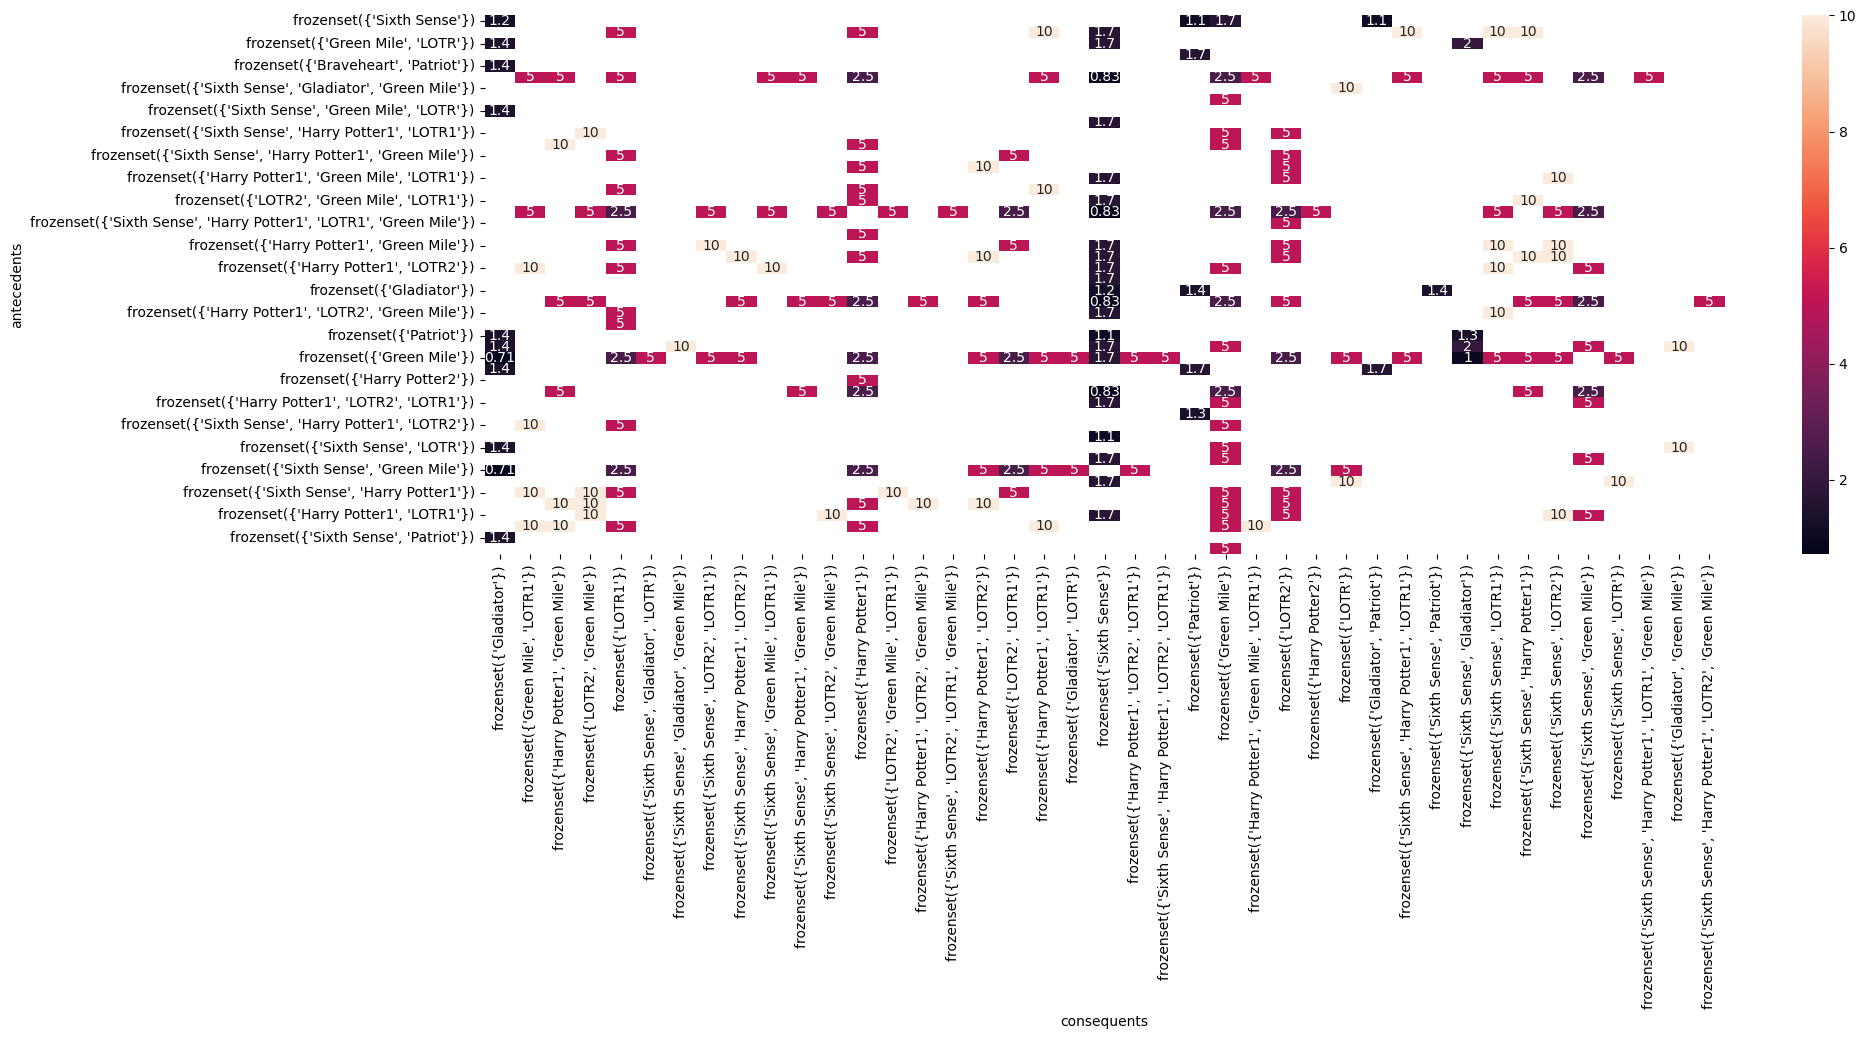

In [21]:
plt.figure(figsize=(20,7))
sns.heatmap(piv,annot=True)

In [22]:
#Association rules with 20% Support and 40% confidence

In [23]:
freq20 = apriori(movie, min_support=0.2, use_colnames=True)
freq20

C:\Users\Yogendra\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [25]:
rules40 = association_rules(freq20, metric='confidence', min_threshold=0.4)
rules40

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000


In [26]:
rules40.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
14,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000


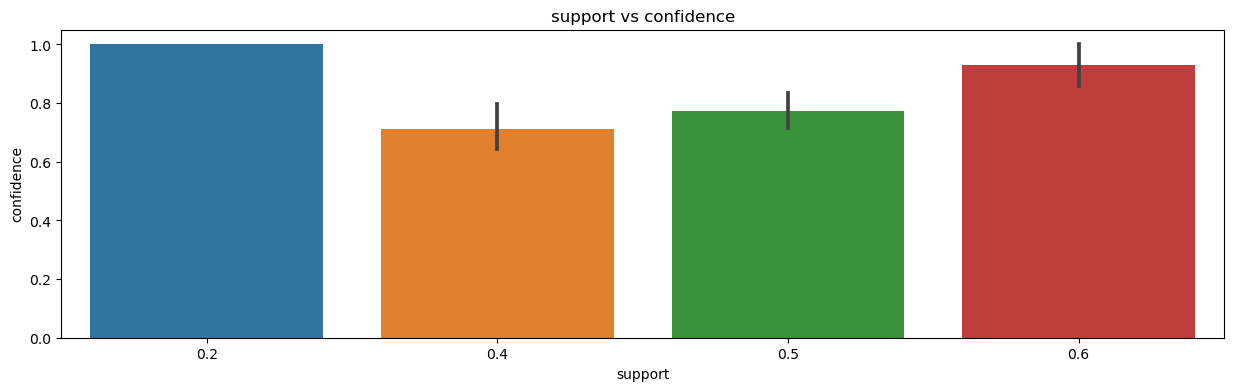

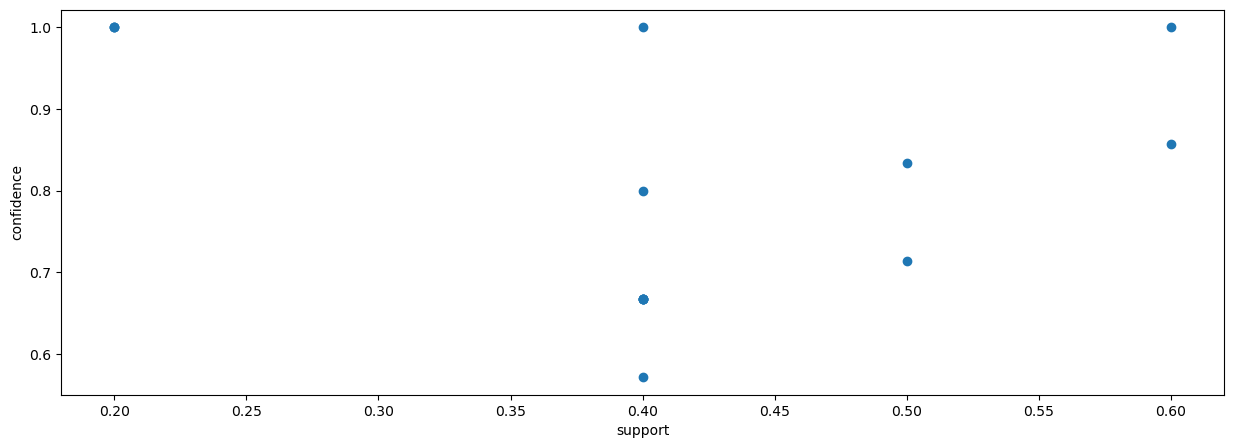

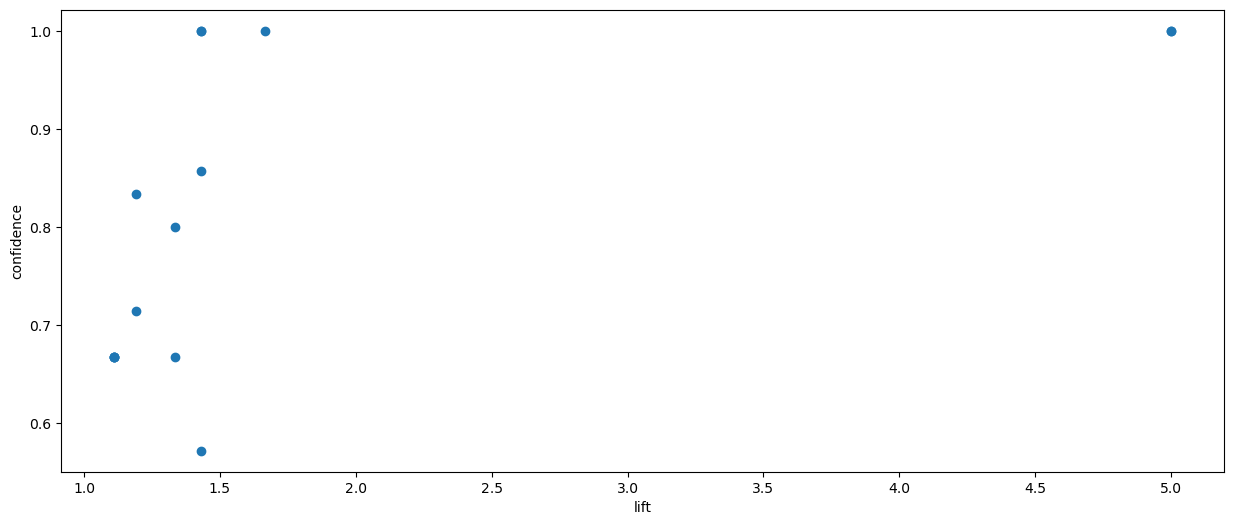

In [27]:
plt.figure(figsize=(15,4))
sns.barplot(rules40,x="support",y="confidence")
plt.title("support vs confidence")
plt.show()

plt.figure(figsize=(15,5))
plt.scatter(rules40['support'],rules40['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

plt.figure(figsize=(15,6))
plt.scatter(rules40['lift'],rules40['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

<Axes: xlabel='consequents', ylabel='antecedents'>

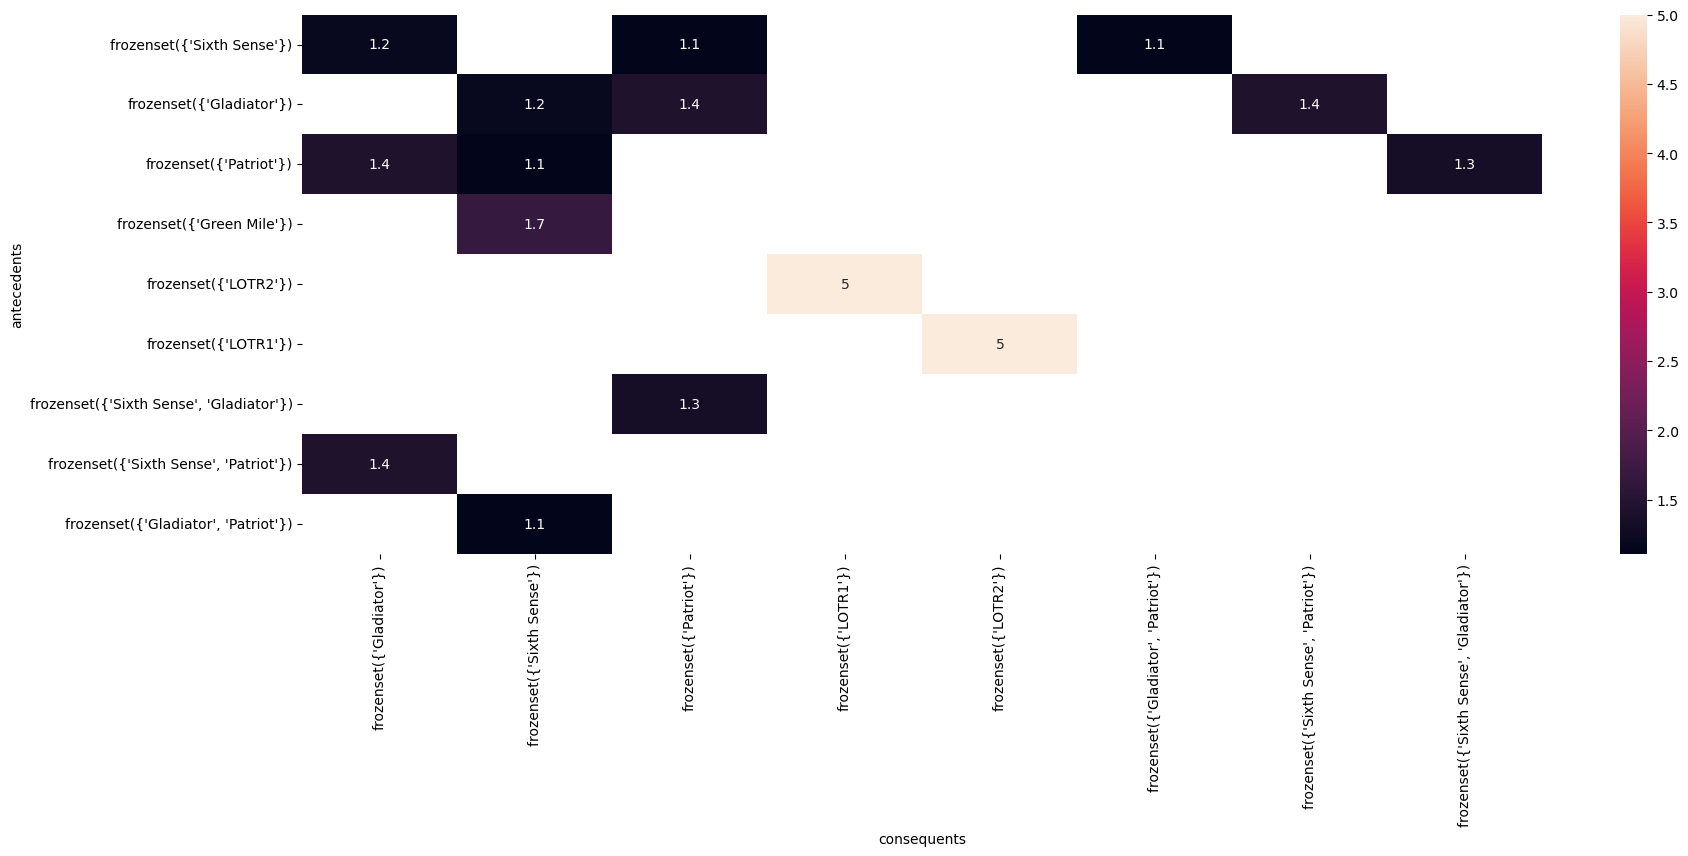

In [28]:
piv40 = rules40.pivot('antecedents','consequents','lift')
plt.figure(figsize=(20,7))
sns.heatmap(piv40,annot=True)

In [ ]:
#Association rules with 10% Support and 30% confidence then no. of rules 210
#Association rules with 20% Support and 40% confidence then no. of rules 14
#As the support and confidence threshold increases, no of rules decreases.